In [7]:
%config Completer.use_jedi = False
%load_ext autoreload

import os
import re
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tensorboard.backend.event_processing import event_accumulator
from IPython.display import clear_output
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
nice_expname = {'t1_all':'All',
                't1_cr-flair':'CR+Flair', 
                't1_cr-t2':'CR+T2', 
                't1_blurring-flair':'b-Flair',
                't1_blurring-t1':'b-T1',
                't1_blurring-t2':'b-T2', 
                't1_entropy':'Entropy', 
                't1_variance':'Variance',
                't1_curv':'Curv',
                't1':'None', 
                't1_thickness':'Thickness', 
                't1_sulc':'Sulc'}

nice_metricname = {'val_dice_score_epoch':'Dice',
                   'val_coverage_epoch':'True Positive',
                   'val_false_positive_epoch':'False Positive',
                   'val_false_negative_epoch': 'False Negative'}

In [3]:
experiments_root = '/workspace/RawData/FCDNet/logs/features_comparison/'

In [5]:
# experiments_dirs = []
# for exp_type in list(filter(lambda x: 't1' in x, os.listdir(experiments_root))):
#     experiments_dir = os.path.join(experiments_root, exp_type)
#     print(exp_type, len(os.listdir(experiments_dir)))
#     experiments_dirs.append(experiments_dir)

experiments_dirs = []

experiment_names = ['t1',
                    't1_thickness',
                    't1_curv',
                    't1_sulc',
                    't1_blurring-t2',
                    't1_blurring-t1',
                    't1_cr-t2',
                    't1_cr-flair',
                    't1_entropy',
                    't1_variance'
                    't1_all'
                    ]

for exp_type in experiment_names:
    experiments_dir = os.path.join(experiments_root, exp_type)
    print(exp_type, len(os.listdir(experiments_dir)))
    experiments_dirs.append(experiments_dir)

In [15]:
glob.glob('/workspace/RawData/FCDNet/logs/features_comparison/*/sulc', recursive=True)

[]

In [6]:
list(filter(lambda x: 't1' in x, os.listdir(experiments_root)))

['t1-all_scaled_large-model',
 't1_blurring-t2',
 't1_blurring-t1',
 't1',
 't1_scaled',
 't1_scaled_large-model',
 't1_thickness',
 't1_normalization_comparison',
 't1_blurring-flair']

In [37]:
# !pip install tensorboard

In [38]:
experiments_metrics = defaultdict(dict)
metrics_names = ['val_dice_score_epoch', 'val_coverage_epoch', 'val_false_positive_epoch', 'val_false_negative_epoch']
n_metrics = len(metrics_names)

# experiments_dir =  os.path.join(experiments_root, 't1_curv')
for experiments_dir in tqdm(experiments_dirs):
    
    exp_type = experiments_dir.split('/')[-1]

    for trial, experiment_name in tqdm(enumerate(os.listdir(experiments_dir))):
        experiment_path = os.path.join(experiments_dir, experiment_name)
        tb_path = os.path.join(experiment_path, 'tb')
        event_name = os.listdir(tb_path)[0]
        event_path = os.path.join(tb_path, event_name) # take an event file 
        ea = event_accumulator.EventAccumulator(event_path, 
                                                size_guidance={ 
                                                                event_accumulator.COMPRESSED_HISTOGRAMS: 0,
                                                                event_accumulator.IMAGES: 0,
                                                                event_accumulator.AUDIO: 0,
                                                                event_accumulator.SCALARS: 10**3,
                                                                event_accumulator.HISTOGRAMS: 0,
                                                               }
                                                )

        ea.Reload()

        metrics_dict = {}
        for metric_name in metrics_names:
            metrics_dict[metric_name] = np.array([event.value for event in ea.Scalars(metric_name)])

        print(f'{len(metrics_dict[metric_name])} epochs in {experiment_name} has found')

        experiments_metrics[exp_type][trial] = metrics_dict
        
clear_output()


  0%|          | 0/12 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:06,  6.57s/it]

280 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASKint-t1-curv_scaler-trial2@22.08.2022-11 has found



2it [00:11,  5.87s/it]
  8%|▊         | 1/12 [00:11<02:09, 11.74s/it]
0it [00:00, ?it/s]

218 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASKint-t1-curv_scaler-trial3@22.08.2022-16 has found



1it [00:07,  7.03s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-entropy_scaler-trial5@24.07.2022-08 has found



2it [00:14,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-entropy_scaler-trial2@22.07.2022-10 has found



3it [00:21,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-entropy_scaler-trial4@24.07.2022-07 has found



4it [00:28,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-entropy_scaler-trial3@22.07.2022-10 has found



5it [00:35,  7.02s/it]
 17%|█▋        | 2/12 [00:46<03:54, 23.43s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-entropy_scaler-trial1@22.07.2022-10 has found



1it [00:07,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t2_scaler-trial2@25.07.2022-07 has found



2it [00:14,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t2_scaler-trial3@25.07.2022-07 has found



3it [00:21,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t2_scaler-trial5@25.07.2022-07 has found



4it [00:28,  7.03s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t2_scaler-trial1@25.07.2022-07 has found



5it [00:35,  7.03s/it]
 25%|██▌       | 3/12 [01:22<04:06, 27.34s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t2_scaler-trial4@25.07.2022-07 has found



1it [00:07,  7.04s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t1_scaler-trial3@17.07.2022-15 has found



2it [00:14,  7.09s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t1_scaler-trial1@14.07.2022-12 has found



3it [00:21,  7.11s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t1_scaler-trial2@16.07.2022-21 has found



4it [00:28,  7.09s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t1_scaler-trial4@18.07.2022-06 has found



5it [00:35,  7.07s/it]
 33%|███▎      | 4/12 [01:57<03:54, 29.35s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-t1_scaler-trial5@18.07.2022-09 has found



1it [00:07,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-flair_scaler-trial3@19.07.2022-09 has found



2it [00:14,  7.03s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-flair_scaler-trial4@19.07.2022-09 has found



3it [00:21,  7.04s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-flair_scaler-trial1@19.07.2022-09 has found



4it [00:28,  7.03s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-flair_scaler-trial5@19.07.2022-09 has found



5it [00:35,  7.02s/it]
 42%|████▏     | 5/12 [02:32<03:33, 30.50s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-flair_scaler-trial2@19.07.2022-09 has found



1it [00:07,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-t2_retest_with_maskinted_scaler-trial3@19.07.2022-09 has found



2it [00:14,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-t2_retest_with_maskinted_scaler-trial5@22.07.2022-10 has found



3it [00:21,  7.03s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-t2_retest_with_maskinted_scaler-trial1@18.07.2022-06 has found



4it [00:28,  7.06s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-t2_retest_with_maskinted_scaler-trial2@19.07.2022-09 has found



5it [00:35,  7.08s/it]
 50%|█████     | 6/12 [03:07<03:07, 31.32s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-cr-t2_retest_with_maskinted_scaler-trial4@19.07.2022-10 has found



1it [00:07,  7.17s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-variance_scaler-trial4@22.07.2022-10 has found



2it [00:14,  7.16s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-variance_scaler-trial2@20.07.2022-06 has found



3it [00:21,  7.15s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-variance_scaler-trial5@22.07.2022-10 has found



4it [00:28,  7.16s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-variance_scaler-trial3@22.07.2022-10 has found



5it [00:35,  7.16s/it]
 58%|█████▊    | 7/12 [03:43<02:39, 31.96s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-variance_scaler-trial1@20.07.2022-06 has found



1it [00:07,  7.12s/it]

299 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1_retest_with_maskinted_scaler-trial3@11.07.2022-11 has found



2it [00:14,  7.11s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1_retest_with_maskinted_scaler-trial4@18.07.2022-06 has found



3it [00:21,  7.08s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1_retest_with_maskinted_scaler-trial5@18.07.2022-06 has found



4it [00:28,  7.08s/it]

298 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1_retest_with_maskinted_scaler-trial1@11.07.2022-11 has found



5it [00:35,  7.09s/it]
 67%|██████▋   | 8/12 [04:19<02:09, 32.40s/it]
0it [00:00, ?it/s]

297 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1_retest_with_maskinted_scaler-trial2@11.07.2022-11 has found



1it [00:07,  7.18s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-thickness_scaler-trial2@20.07.2022-06 has found



2it [00:14,  7.16s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-thickness_scaler-trial4@20.07.2022-06 has found



3it [00:21,  7.16s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-thickness_scaler-trial1@19.07.2022-09 has found



4it [00:28,  7.13s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-thickness_scaler-trial3@20.07.2022-06 has found



5it [00:35,  7.11s/it]
 75%|███████▌  | 9/12 [04:54<01:38, 32.75s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-thickness_scaler-trial5@20.07.2022-06 has found



1it [00:07,  7.00s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-sulc_scaler-rerun_trail2@10.08.2022-20 has found



2it [00:14,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-sulc_scaler-rerun_trail4@10.08.2022-20 has found



3it [00:21,  7.00s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-sulc_scaler-rerun_trail5@10.08.2022-20 has found



4it [00:28,  7.03s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-sulc_scaler-rerun_trail3@10.08.2022-20 has found



5it [00:35,  7.02s/it]
 83%|████████▎ | 10/12 [05:29<01:05, 32.98s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-sulc_scaler-rerun_trail1@10.08.2022-20 has found



1it [00:07,  7.00s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-flair_scaler-trial2@18.07.2022-10 has found



2it [00:14,  7.01s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-flair_scaler-trial3@18.07.2022-10 has found



3it [00:21,  7.02s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-flair_scaler-trial4@18.07.2022-10 has found
1 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-flair_scaler-trial5@19.07.2022-09 has found



5it [00:28,  5.62s/it]
 92%|█████████▏| 11/12 [05:57<00:32, 32.54s/it]
0it [00:00, ?it/s]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-blurring-flair_scaler-trial1@18.07.2022-10 has found



1it [00:07,  7.08s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-all_scaler-trial1@26.07.2022-20 has found



2it [00:14,  7.10s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-all_scaler-trial3@26.07.2022-20 has found



3it [00:21,  7.07s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-all_scaler-trial2@26.07.2022-20 has found



4it [00:28,  7.08s/it]

300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-all_scaler-trial5@26.07.2022-20 has found



5it [00:35,  7.09s/it]


300 epochs in v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-all_scaler-trial4@29.07.2022-11 has found


FileNotFoundError: [Errno 2] No such file or directory: '/workspace/RawData/FCDNet/logs/features_comparison/t1_all/.ipynb_checkpoints/tb'

In [39]:
learning_plots = False

# statistics [mean, std] for each (exp_type, metric_name) pair
stats_all = defaultdict(dict)

# iterate over different experiments e.g. [t1, t1+curv ,t1+cr, ...]
for exp_type, exp_trials in experiments_metrics.items():
    
    stat_points = defaultdict(list)
    if learning_plots:
        fig, axes = plt.subplots(nrows=1, ncols=n_metrics, figsize=(n_metrics*5,5), dpi=200)
    # over different trials of the same experiment
    for trial_num, trial_metrics in exp_trials.items():
        if trial_num > 4:
            break
        # over metrics within single trial
        for i, metric_name in enumerate(metrics_names):
            stat_points[metric_name].append(trial_metrics[metric_name][-20:])
            
            if learning_plots:
                axes[i].plot(trial_metrics[metric_name], label=trial)
                axes[i].set_title(metric_name)
    
    if learning_plots:
        fig.suptitle(exp_type, fontsize=20, color='blue')
        plt.show()
    
    for metric_name, metric_stat_points in stat_points.items():
        metric_stat_points_cat = np.concatenate(metric_stat_points)
        stats_all[metric_name][exp_type] = metric_stat_points_cat


In [40]:
def fill_observation_dict(observation_dict, min_values=10):
    '''
    observation_dict - {'key_1', [...], ..., 'key_n', [...]}
    '''
    
    observation_dict_ = {}
    
    min_len = min([len(v) for k,v in observation_dict.items()])
    assert min_len >= min_values, f'Only {min_len} in some array!'
    
    for k,v in observation_dict.items():
        observation_dict_[k] = v[:min_len]
    
    return observation_dict_

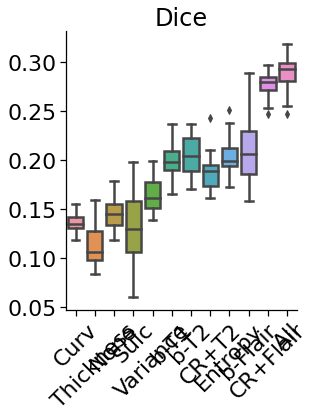

In [41]:

for metric_name in metrics_names[:1]:
    
    stats_metric_all = stats_all[metric_name]
    # df for specific metric across different experiments
    df_stats_metric = pd.DataFrame(fill_observation_dict(stats_metric_all), columns=stats_metric_all.keys())
    df_stats_metric = df_stats_metric.reindex(df_stats_metric.max().sort_values().index, axis=1)

    df_stats_metric = df_stats_metric.rename(columns=nice_expname)
    
    sns.axes_style("darkgrid")
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5, 'figure.figsize':(20,10)})
    
    sns.catplot(kind="box", data=df_stats_metric)
    
    plt.title(nice_metricname[metric_name])
    plt.xticks(rotation=45)
    plt.show()

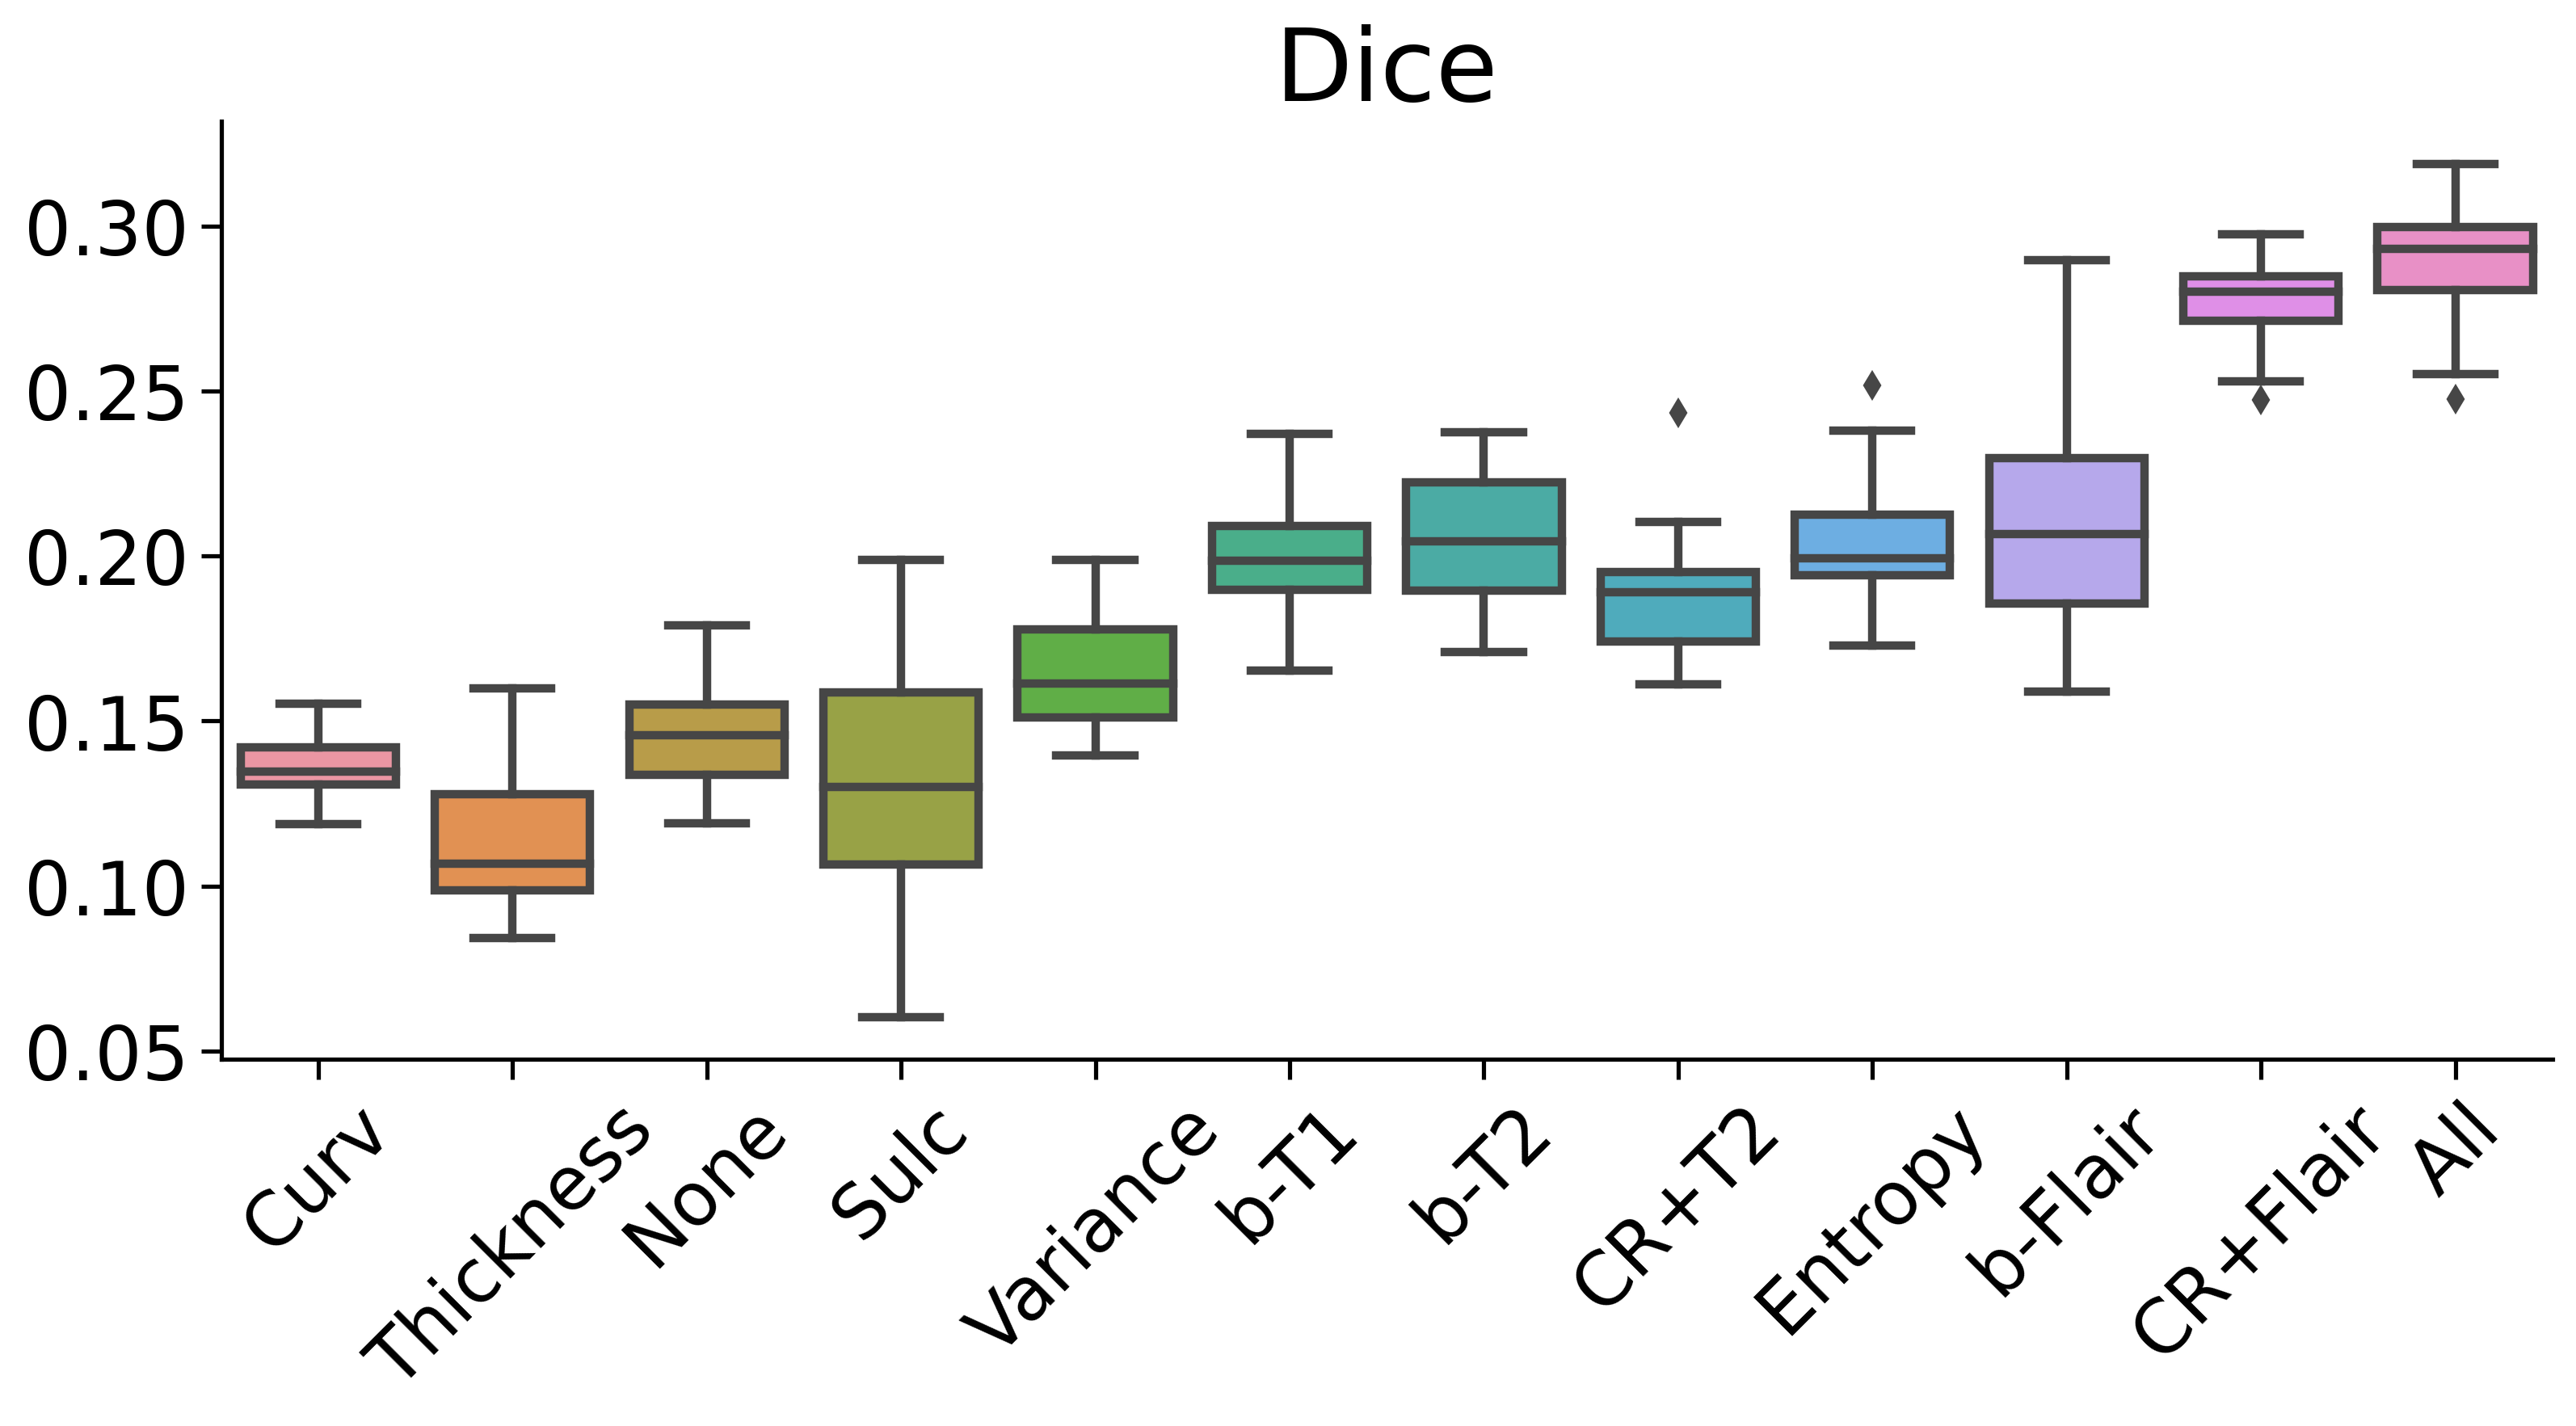

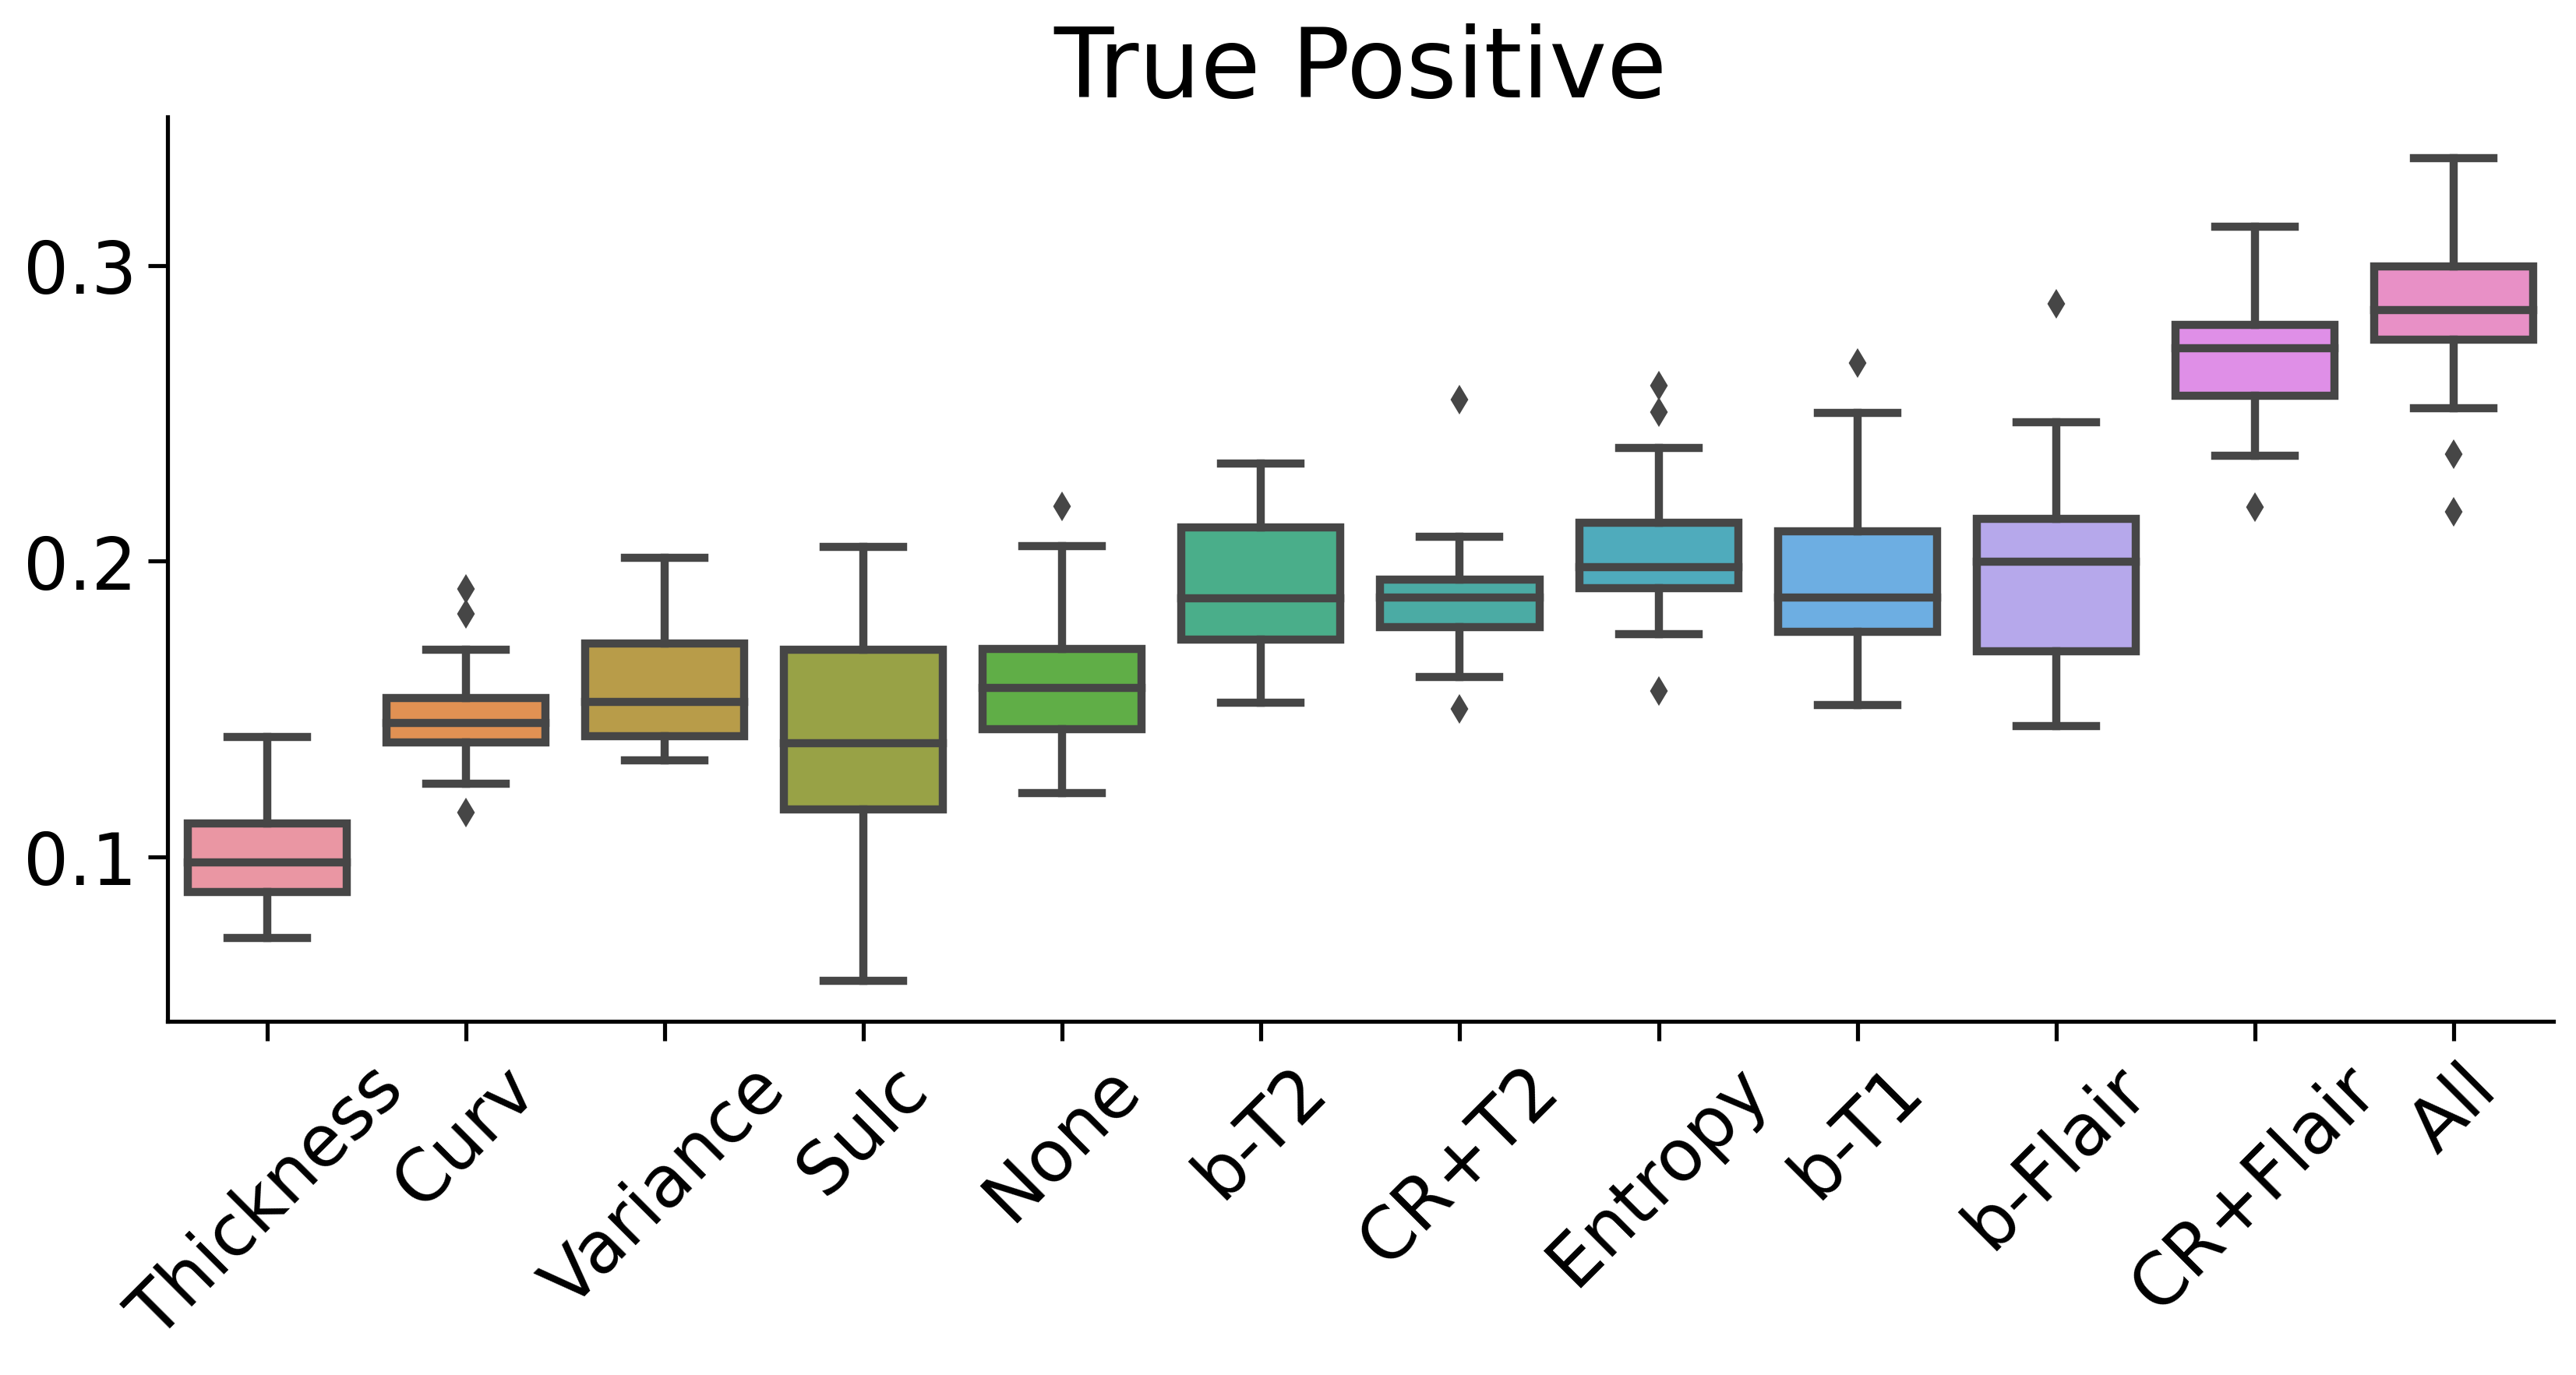

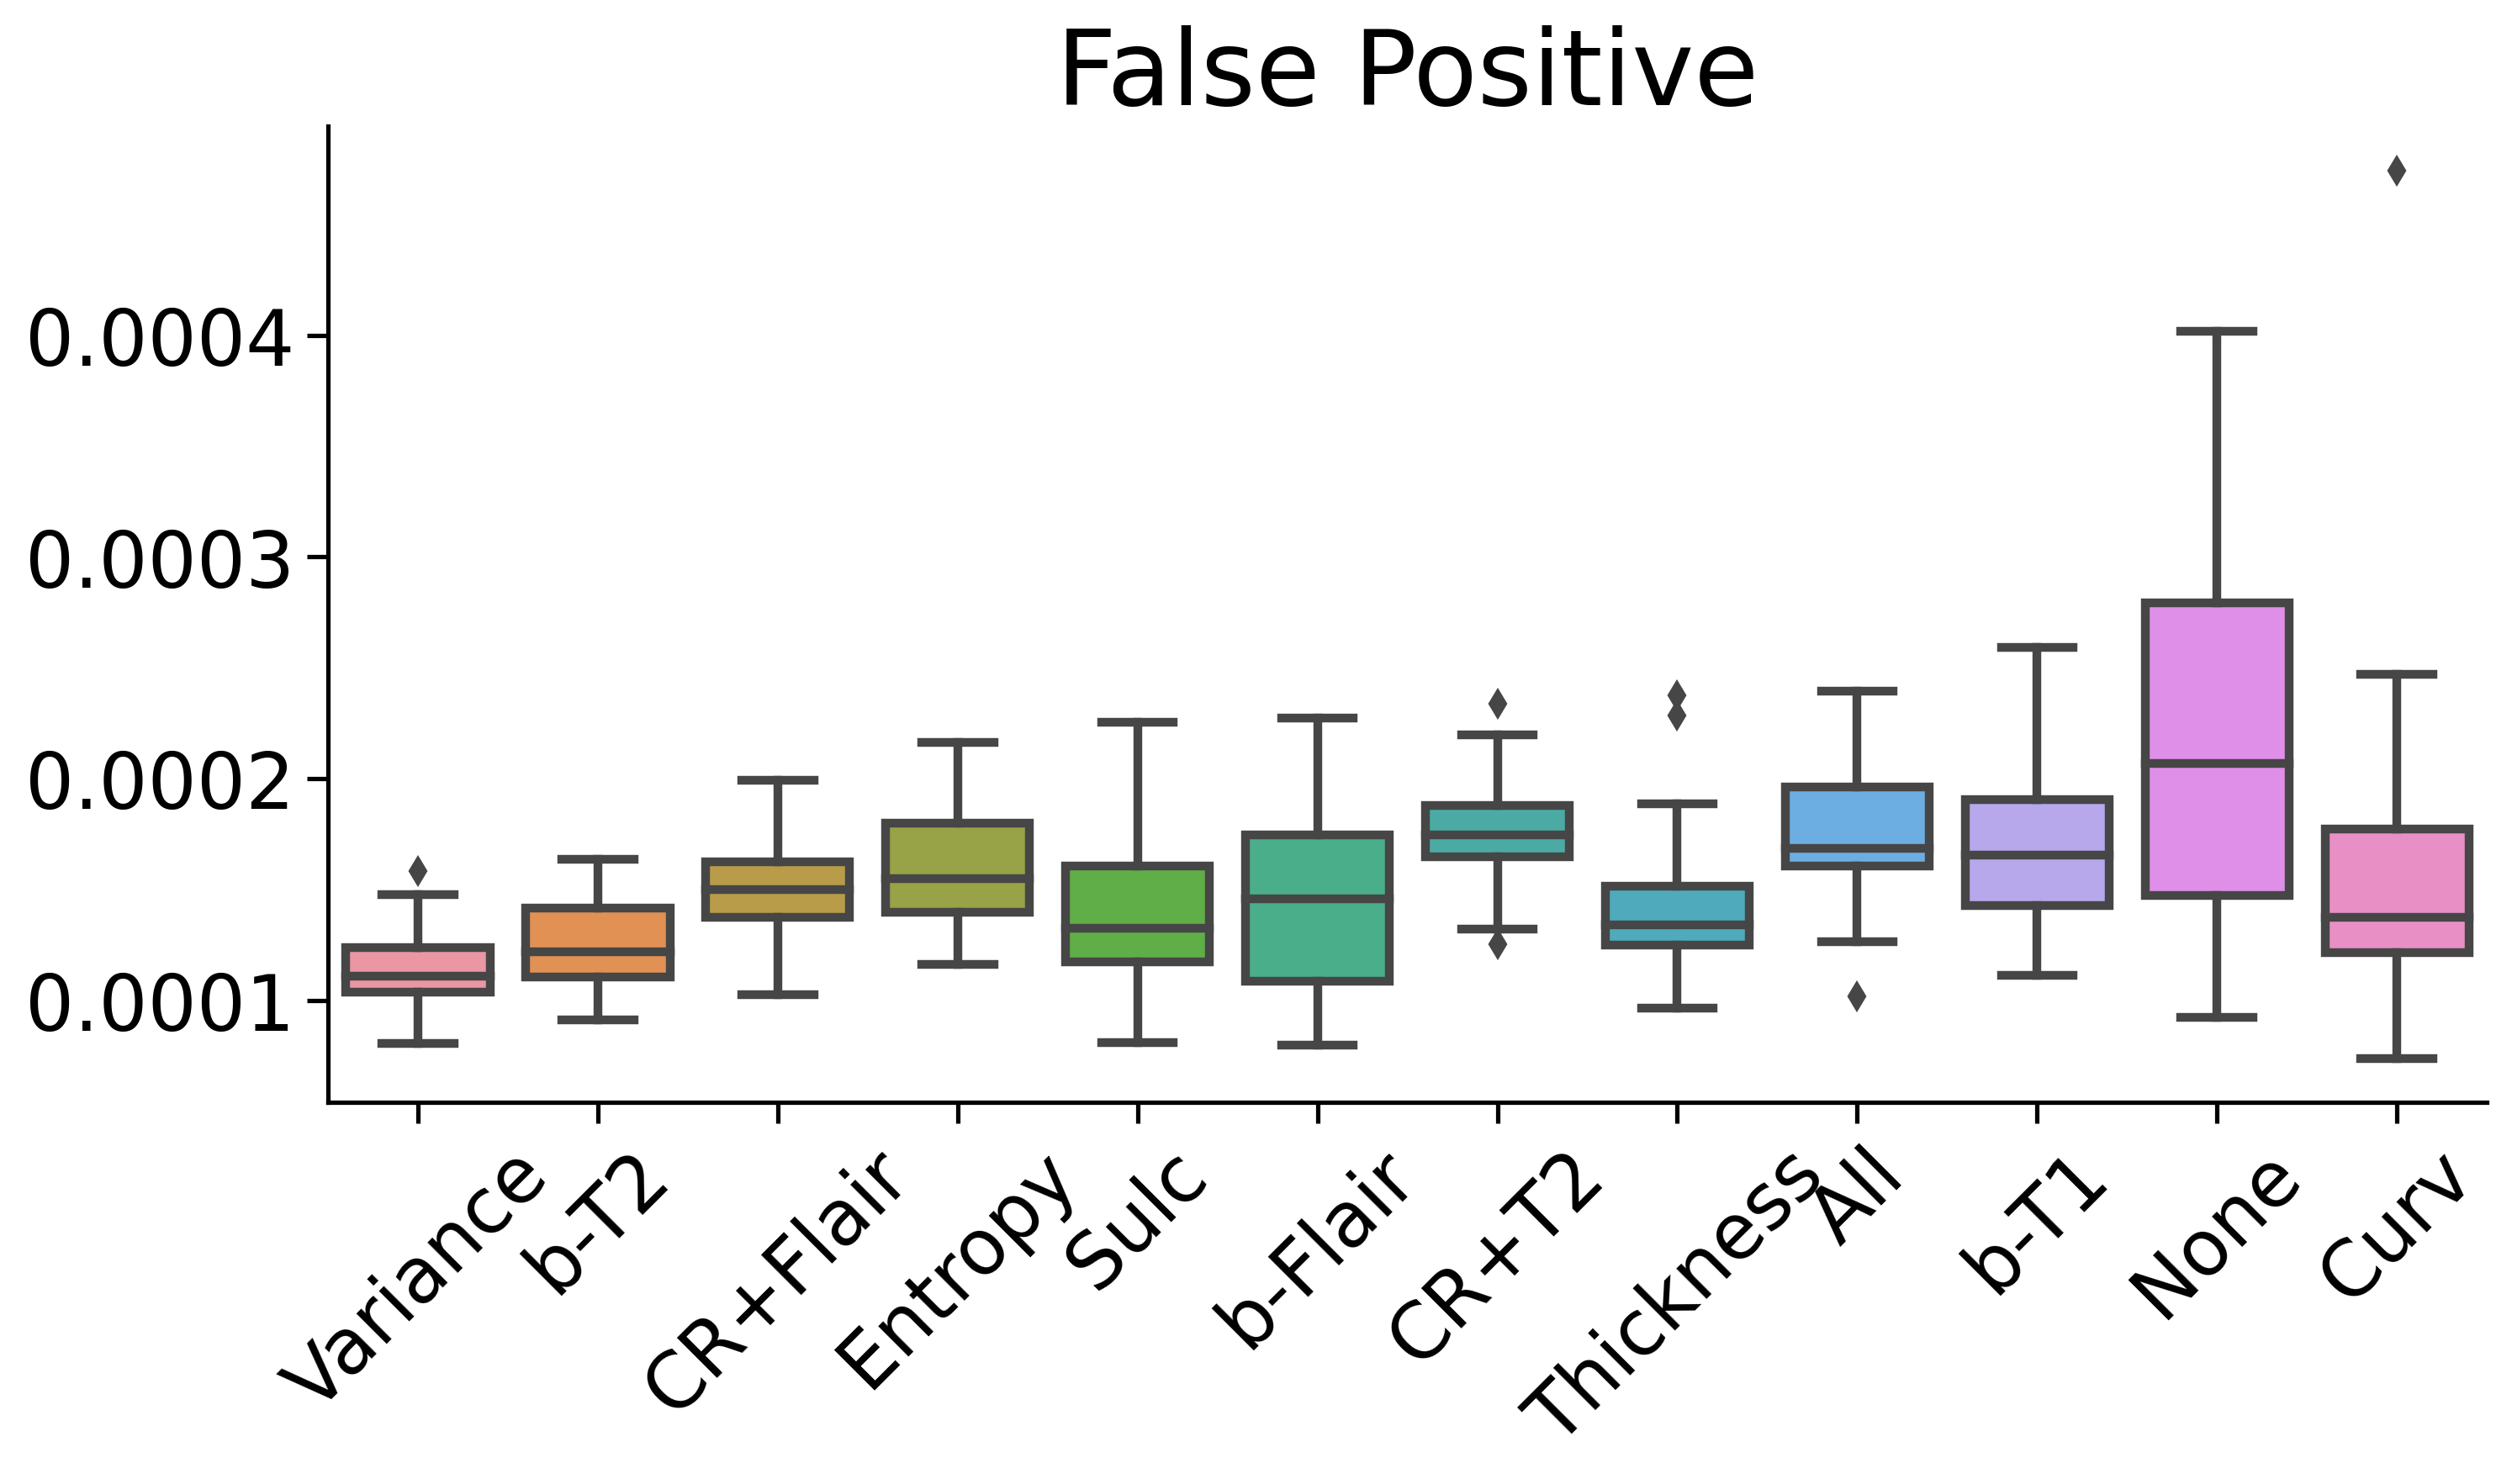

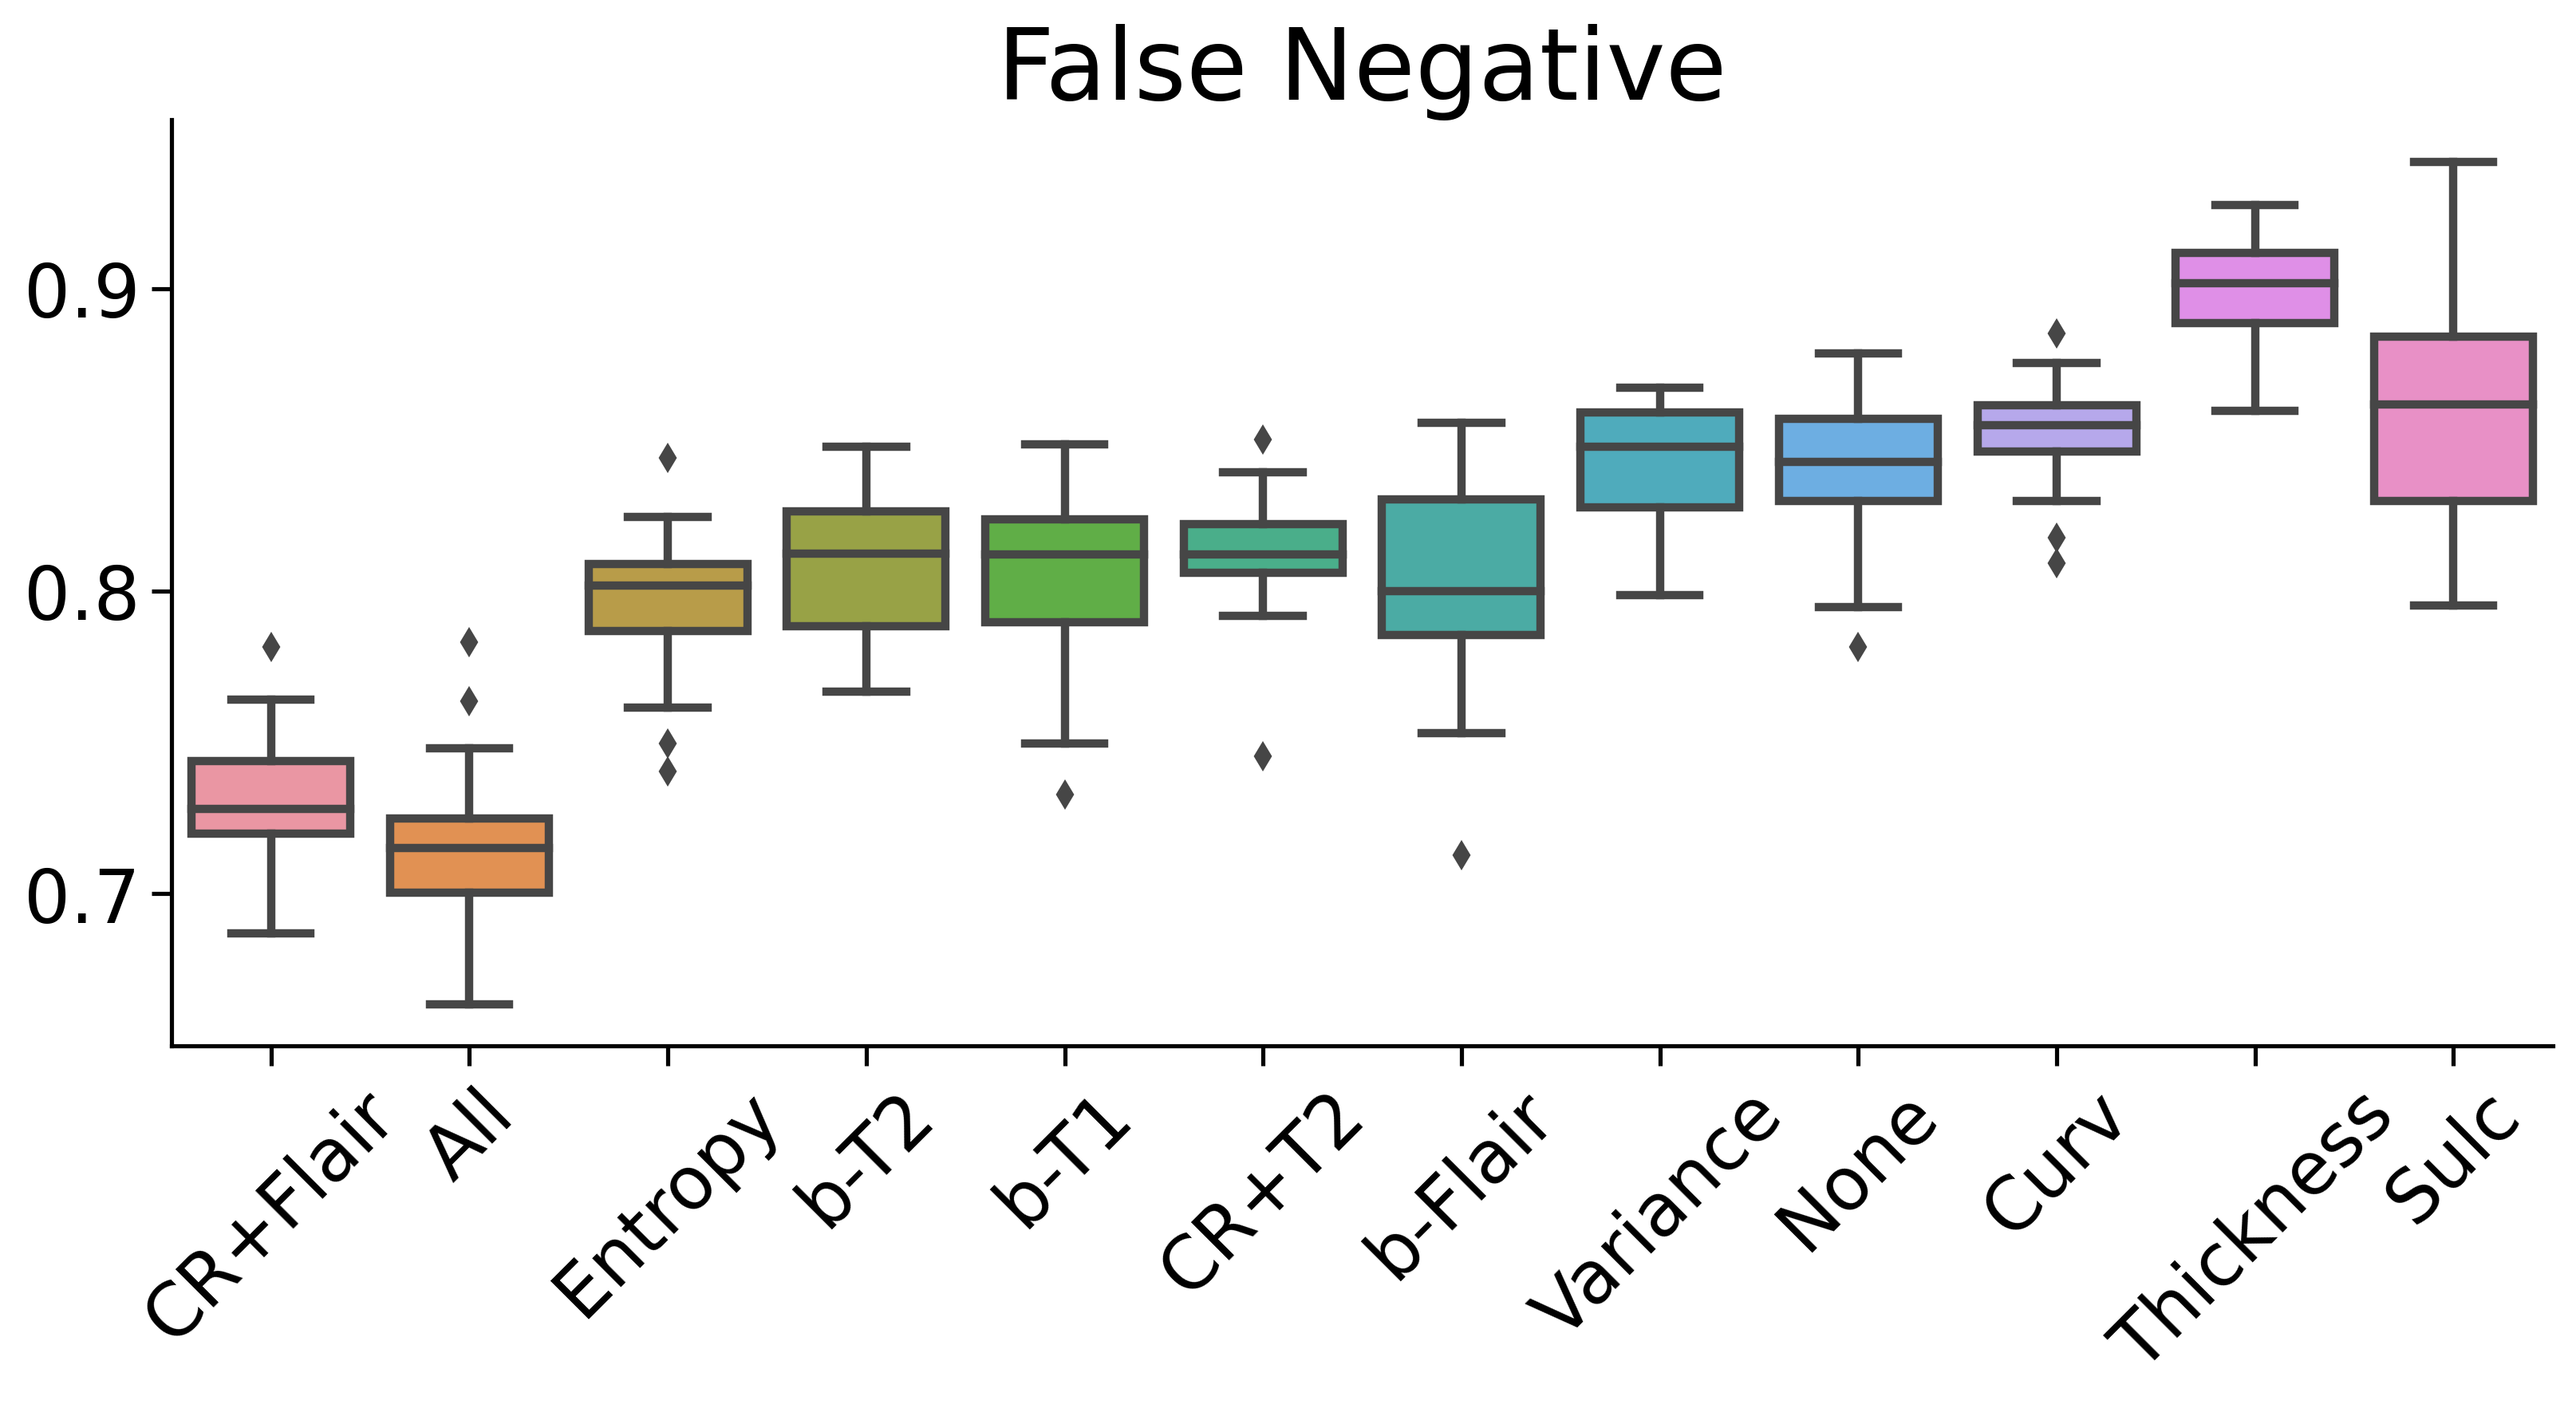

In [78]:
for metric_name in metrics_names:
    
    stats_metric_all = stats_all[metric_name]
    # df for specific metric across different experiments
    df_stats_metric = pd.DataFrame(fill_observation_dict(stats_metric_all), columns=stats_metric_all.keys())
    df_stats_metric = df_stats_metric.reindex(df_stats_metric.max().sort_values().index, axis=1)

    df_stats_metric = df_stats_metric.rename(columns=nice_expname)
    
    sns.axes_style("darkgrid")
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5, 'figure.figsize':(30,10)})
    
    g = sns.catplot(kind="box", data=df_stats_metric)
    g.fig.set_size_inches(15,5)
    g.fig.set_dpi(300)
    
    plt.title(nice_metricname[metric_name], fontsize=30)
    plt.xticks(rotation=45)
    plt.show()
    
    # break

# Cross-validation

In [ ]:
split_path = 'FCDNet/logs/cross_validation_all/t1_all_cv/v2v-IN_autocast_DICE_lr-1e-3_nG-bs2-AUG-MASK-to-all-imgch-t1-all-cv@07.09.2022-05@fold-6'
np.load('')